Nama : Zulfikar Irham

NIM : 21/475393/PA/20574

## **Tugas** Modul 3 Praktikum Metode Numerik

Pencarian akar-akar atau titik-titik nol dari beberapa fungsi khas (_special functions_) banyak dilakukan di beberapa prosedur penyelesaian permasalahan fisika dan matematika. Sebagai contoh, pencarian titik-titik nol bagi salah satu fungsi khas, yaitu Polinomial Hermite $H_n(x)$, akan muncul pada beberapa permasalahan sistem kuantum serta pencarian peubah bebas dalam masalah kuadratur numerik. Dalam hal ini bentuk masalah pencarian akar-akar bagi fungsi akan berbentuk:
$$H_n(x)=0$$
dengan $n$ adalah orde dari polinomial Hermite.

Metode evaluasi polinomial Hermite $H_n(x)$ menggunakan ungkapan deret maupun kaitan rekurensi dapat merujuk pada materi yang disampaikan di Modul 2 Praktikum Metode Numerik. Ungkapan bagi turunan pertama polinomial Hermite dapat dinyatakan dalam bentuk
$$\frac{dH_n(x)}{dx}=H_n^{'}(x)=2nH_{n-1}(x)$$
1. Metode Bisection
> Tentukan keseluruhan akar-akar dari polinomial $H_n(x)$ pada orde 10 yaitu $n=10$ dengan menggunakan metode Bisection.
2. Metode Newton-Raphson
> Tentukan keseluruhan akar-akar dari polinomial $H_n(x)$ pada orde 10 yaitu $n=10$ dengan menggunakan metode Newton-Raphsonn.

# No.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def hermiten(x,n):
    yrekur0 = 1.0+0.0*x
    yrekur1 = 2.0*x
    if n == 0:
        return yrekur0
    if n == 1:
        return yrekur1
    else:
        for i in range(1,n):
            yrekur = 2.0*x*yrekur1 - 2.0*i*yrekur0
            yrekur0 = yrekur1
            yrekur1 = yrekur
        return yrekur

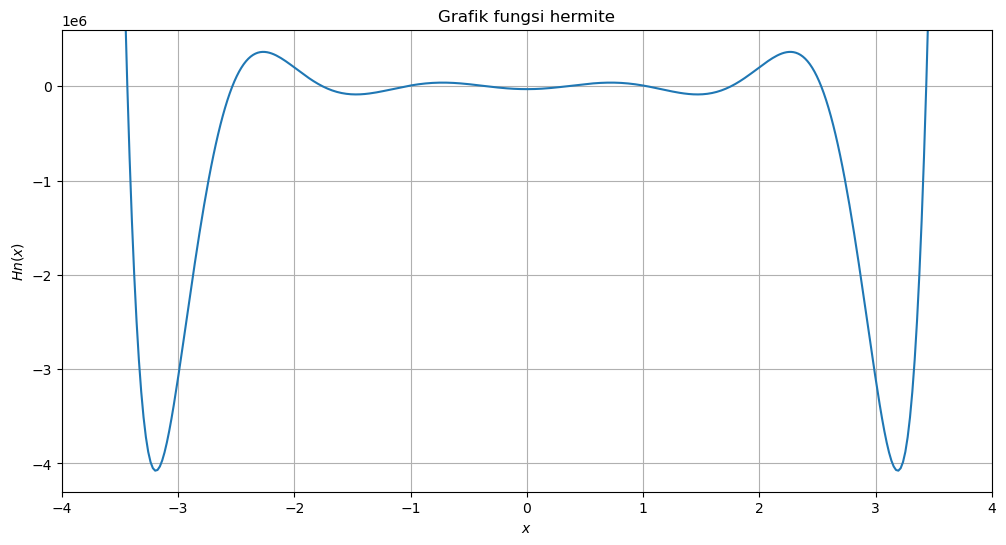

In [89]:
fig, ax = plt.subplots(figsize=(12,6))
n = 10
x = np.linspace(-5,5,500)
y = hermiten(x,n)
ax.plot(x,y)
ax.set_title("Grafik fungsi hermite")
ax.set_ylabel("$Hn(x)$")
ax.set_xlabel("$x$")
plt.ylim([-4300000,600000])
plt.xlim([-4,4])
plt.grid()

Dapat dilihat dari grafik terdapat 10 nilai akar

Nilai akarnya terdapat pada rentang sebagai berikut:

$-4 < x < -3$

$-3 < x < -2$

$-2 < x < -1.5$

$-1.5 < x < -0.9$

$-0.9 < x < 0$

$0 < x < 0.5$

$0.5 < x < 1.5$

$1.5 < x < 2$

$2 < x < 3$

$3 < x < 4$

Nilai akar pada rentang tersebut yang akan dicari di bawah dengan metode bisection

In [31]:
from math import pi 
import numpy as np
def bisection(f,a,b,N):
    an = a
    bn = b
    for n in range(1,N+1):
        mn = (an + bn)/2
        fmn = f(mn)
        if f(an)*fmn < 0:
            an = an
            bn = mn
        elif f(bn)*fmn < 0:
            an = mn
            bn = bn
        elif fmn == 0:
            print("Diperoleh solusi eksak")
            return mn
        else:
            return "Metode gagal"
    return (an + bn)/2

In [75]:
f = lambda x:hermiten(x,n)
N = 50
nilai_akar1 = bisection(f,-4,-3,N)
nilai_akar1

-3.4361591188377374

In [76]:
nilai_akar2 = bisection(f,-3,-2,N)
nilai_akar2

-2.53273167423279

In [77]:
nilai_akar3 = bisection(f,-2,-1.5,N)
nilai_akar3

-1.7566836492998819

In [78]:
nilai_akar4 = bisection(f,-1.5,-0.9,N)
nilai_akar4

-1.0366108297895136

In [79]:
nilai_akar5 = bisection(f,-0.9,0,N)
nilai_akar5

-0.3429013272237043

In [80]:
nilai_akar6 = bisection(f,0,0.5,N)
nilai_akar6

0.3429013272237047

In [81]:
nilai_akar7 = bisection(f,0.5,1.5,N)
nilai_akar7

1.0366108297895136

In [82]:
nilai_akar8 = bisection(f,1.5,2,N)
nilai_akar8

1.7566836492998819

In [83]:
nilai_akar9 = bisection(f,2,3,N)
nilai_akar9

2.53273167423279

In [84]:
nilai_akar10 = bisection(f,3,4,N)
nilai_akar10

3.4361591188377374

In [85]:
nilai_akar = []
x = np.linspace(-4,4,25)
for i in range(len(x)-1):
    akar = bisection(f,x[i],x[i+1],N)
    if akar != "Metode gagal":
        nilai_akar.append(akar)
nilai_akar = np.array(nilai_akar)
nilai_akar

array([-3.43615912, -2.53273167, -1.75668365, -1.03661083, -0.34290133,
        0.34290133,  1.03661083,  1.75668365,  2.53273167,  3.43615912])

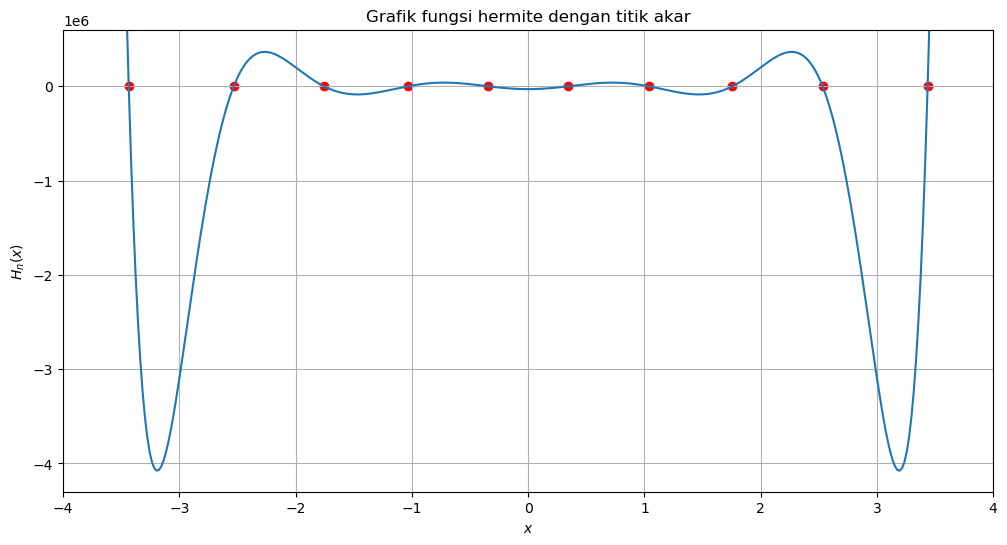

In [92]:
fig, ax = plt.subplots(figsize=(12,6))
x_scatter = nilai_akar
y_scatter = hermiten(x_scatter,n)
n = 10
x = np.linspace(-5,5,500)
y = hermiten(x,n)
ax.plot(x,y)
ax.scatter(x_scatter,y_scatter, color = "red")
ax.set_title("Grafik fungsi hermite dengan titik akar")
ax.set_xlabel("$x$")
ax.set_ylabel("$H_n(x)$")
plt.ylim([-4300000,600000])
plt.xlim([-4,4])
plt.grid()


# No.2

dengan kaitan rekurensi dari polinomial hermite sebagai berikut:

$$H_{n+1}=2xH_n - 2nH_{n-1}$$

dan

$$\frac{dH_n(x)}{dx}=H^{'}_n(x)=2nH_{n-1}$$

Maka dapat dicari akar-akarnya dengan metode Newton Raphson sebagai berikut:

In [47]:
#Fungsi Hermite
def hermiten(x,n):
    yrekur0 = 1.0+0.0*x
    yrekur1 = 2.0*x
    if n == 0:
        return yrekur0
    if n == 1:
        return yrekur1
    else:
        for i in range(1,n):
            yrekur = 2.0*x*yrekur1 - 2.0*i*yrekur0
            yrekur0 = yrekur1
            yrekur1 = yrekur
        return yrekur

In [48]:
#Fungsi turunan hermite
def dhermiten(x,n):
    n1 = n-1
    yrekur = 2.0*n*hermiten(x,n1)
    return yrekur

In [52]:
#Fungsi Newton Raphson
def NewtonRaphson(n,x0,tol,imak):
    i = 0
    while i < imak:
        if dhermiten(x0,n) == 0.0:
            print('Ada pembagian dengan nol')
            break
        i = i + 1
        x1 = x0 - hermiten(x0,n)/dhermiten(x0,n)
        delta = x1 - x0
        #selisih antara dua variiabel tetap positif
        if (delta < 0):
            delta = - delta
        print('Hasil iterasi ke-%d, x1 = %0.6f and f(x1) = %0.6f' % (i, x1,hermiten(x1,n)))
        x0 = x1
        if i >= imak:
            print('\nNilai akar adalah: %0.8f' % x1)
        #penghentian perhitungan jika selisih sudah lebih kecil dari toleransi
        if delta <= tol:
            print('\nNilai akar adalah: %0.8f' % x1)
            break

In [56]:
#bagian input nilai akar1
n = 10
x0 = -4
tol = 0.00001
imak = 25
# Pemanggilan Newton-Rapshon
NewtonRaphson(n,x0,tol,imak)

Hasil iterasi ke-1, x1 = -3.772821 and f(x1) = 40246135.673765
Hasil iterasi ke-2, x1 = -3.602138 and f(x1) = 11876408.780855
Hasil iterasi ke-3, x1 = -3.492958 and f(x1) = 2857411.234296
Hasil iterasi ke-4, x1 = -3.445180 and f(x1) = 386321.689998
Hasil iterasi ke-5, x1 = -3.436429 and f(x1) = 11212.908813
Hasil iterasi ke-6, x1 = -3.436159 and f(x1) = 10.374264
Hasil iterasi ke-7, x1 = -3.436159 and f(x1) = 0.000009

Nilai akar adalah: -3.43615912


In [57]:
#bagian input nilai akar2
n = 10
x0 = -3
tol = 0.00001
imak = 25
# Pemanggilan Newton-Rapshon
NewtonRaphson(n,x0,tol,imak)

Hasil iterasi ke-1, x1 = -2.619851 and f(x1) = -335246.611763
Hasil iterasi ke-2, x1 = -2.546760 and f(x1) = -45494.192279
Hasil iterasi ke-3, x1 = -2.533203 and f(x1) = -1477.756860
Hasil iterasi ke-4, x1 = -2.532732 and f(x1) = -1.758885
Hasil iterasi ke-5, x1 = -2.532732 and f(x1) = -0.000003

Nilai akar adalah: -2.53273167


In [58]:
#bagian input nilai akar3
n = 10
x0 = -2
tol = 0.00001
imak = 25
# Pemanggilan Newton-Rapshon
NewtonRaphson(n,x0,tol,imak)

Hasil iterasi ke-1, x1 = -1.782836 and f(x1) = 17046.313623
Hasil iterasi ke-2, x1 = -1.757751 and f(x1) = 666.917533
Hasil iterasi ke-3, x1 = -1.756686 and f(x1) = 1.242195
Hasil iterasi ke-4, x1 = -1.756684 and f(x1) = 0.000004

Nilai akar adalah: -1.75668365


In [60]:
#bagian input nilai akar4
n = 10
x0 = -1.2
tol = 0.00001
imak = 25
# Pemanggilan Newton-Rapshon
NewtonRaphson(n,x0,tol,imak)

Hasil iterasi ke-1, x1 = -1.038976 and f(x1) = -555.235223
Hasil iterasi ke-2, x1 = -1.036617 and f(x1) = -1.337147
Hasil iterasi ke-3, x1 = -1.036611 and f(x1) = -0.000008

Nilai akar adalah: -1.03661083


In [62]:
#bagian input nilai akar5
n = 10
x0 = -0.5
tol = 0.00001
imak = 25
# Pemanggilan Newton-Rapshon
NewtonRaphson(n,x0,tol,imak)

Hasil iterasi ke-1, x1 = -0.325714 and f(x1) = -2506.904699
Hasil iterasi ke-2, x1 = -0.343034 and f(x1) = 19.474089
Hasil iterasi ke-3, x1 = -0.342901 and f(x1) = 0.000883
Hasil iterasi ke-4, x1 = -0.342901 and f(x1) = 0.000000

Nilai akar adalah: -0.34290133


In [64]:
#bagian input nilai akar6
n = 10
x0 = 0.2
tol = 0.00001
imak = 25
# Pemanggilan Newton-Rapshon
NewtonRaphson(n,x0,tol,imak)

Hasil iterasi ke-1, x1 = 0.373293 and f(x1) = 4497.218946
Hasil iterasi ke-2, x1 = 0.343050 and f(x1) = 21.817055
Hasil iterasi ke-3, x1 = 0.342901 and f(x1) = 0.001108
Hasil iterasi ke-4, x1 = 0.342901 and f(x1) = -0.000000

Nilai akar adalah: 0.34290133


In [65]:
#bagian input nilai akar7
n = 10
x0 = 1
tol = 0.00001
imak = 25
# Pemanggilan Newton-Rapshon
NewtonRaphson(n,x0,tol,imak)

Hasil iterasi ke-1, x1 = 1.038358 and f(x1) = -409.989785
Hasil iterasi ke-2, x1 = 1.036614 and f(x1) = -0.732937
Hasil iterasi ke-3, x1 = 1.036611 and f(x1) = -0.000002

Nilai akar adalah: 1.03661083


In [66]:
#bagian input nilai akar8
n = 10
x0 = 2
tol = 0.00001
imak = 25
# Pemanggilan Newton-Rapshon
NewtonRaphson(n,x0,tol,imak)

Hasil iterasi ke-1, x1 = 1.782836 and f(x1) = 17046.313623
Hasil iterasi ke-2, x1 = 1.757751 and f(x1) = 666.917533
Hasil iterasi ke-3, x1 = 1.756686 and f(x1) = 1.242195
Hasil iterasi ke-4, x1 = 1.756684 and f(x1) = 0.000004

Nilai akar adalah: 1.75668365


In [67]:
#bagian input nilai akar9
n = 10
x0 = 3
tol = 0.00001
imak = 25
# Pemanggilan Newton-Rapshon
NewtonRaphson(n,x0,tol,imak)

Hasil iterasi ke-1, x1 = 2.619851 and f(x1) = -335246.611763
Hasil iterasi ke-2, x1 = 2.546760 and f(x1) = -45494.192279
Hasil iterasi ke-3, x1 = 2.533203 and f(x1) = -1477.756860
Hasil iterasi ke-4, x1 = 2.532732 and f(x1) = -1.758885
Hasil iterasi ke-5, x1 = 2.532732 and f(x1) = -0.000003

Nilai akar adalah: 2.53273167


In [68]:
#bagian input nilai akar10
n = 10
x0 = 4
tol = 0.00001
imak = 25
# Pemanggilan Newton-Rapshon
NewtonRaphson(n,x0,tol,imak)

Hasil iterasi ke-1, x1 = 3.772821 and f(x1) = 40246135.673765
Hasil iterasi ke-2, x1 = 3.602138 and f(x1) = 11876408.780855
Hasil iterasi ke-3, x1 = 3.492958 and f(x1) = 2857411.234296
Hasil iterasi ke-4, x1 = 3.445180 and f(x1) = 386321.689998
Hasil iterasi ke-5, x1 = 3.436429 and f(x1) = 11212.908813
Hasil iterasi ke-6, x1 = 3.436159 and f(x1) = 10.374264
Hasil iterasi ke-7, x1 = 3.436159 and f(x1) = 0.000009

Nilai akar adalah: 3.43615912
